# MODELO  NO SUPERVISADO 

In [1]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Se cargan los datasets de puntajes asginados por usuarios de las plataformas
p1 = pd.read_csv('..\\datasets\\puntajes\\1.csv')
#p2 = pd.read_csv('..\\datasets\\puntajes\\2.csv')
#p3 = pd.read_csv('..\\datasets\\puntajes\\3.csv')
# p4 = pd.read_csv('..\\datasets\\puntajes\\4.csv')
# p5 = pd.read_csv('..\\datasets\\puntajes\\5.csv')
# p6 = pd.read_csv('..\\datasets\\puntajes\\6.csv')
#p7 = pd.read_csv('..\\datasets\\puntajes\\7.csv')
#p8 = pd.read_csv('..\\datasets\\puntajes\\8.csv')

In [3]:
p1.head(5)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [ ]:
# Se concatenan los datasets
# punt = pd.concat([p1, p2, p3, p4, p5, p6, p7, p8], axis=0, ignore_index=True)

In [4]:
# lo llamo punt para no cambiar el codigo que sigue
punt = p1

In [5]:
# Se borra la columna timestamp porque no se utilizará
punt = punt.drop(columns = ['timestamp'])

In [6]:
# Se verifica el tipo de dato de cada columna
punt. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   userId   1500000 non-null  int64  
 1   rating   1500000 non-null  float64
 2   movieId  1500000 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 34.3+ MB


In [7]:
# Se verifica que no hayan valores nulos
punt.isna().sum()

userId     0
rating     0
movieId    0
dtype: int64

#### Se hace el filtrado de acuerdo a nuestro dataset para obtener las puntuaciones de sólamente las peliculas que se poseen

In [8]:
# Se importa el dataset final (CSV) y se visualiza
peliculas=pd.read_csv(r'..\\datasets\\peliculas_final.csv')

In [9]:
peliculas.head(5)

,show_id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero,codireccion,elenco_oscar,elenco_gg,punt_media
0,as2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,amazon,Drama,0,0,0,3.548682
1,as17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,amazon,Horror,0,0,0,3.498984
2,as20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,amazon,Science Fiction,0,0,0,3.586777
3,as23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,amazon,Arts,0,0,0,3.594092
4,as25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,amazon,Drama,0,0,0,3.552846


In [10]:
# Se realiza el filtrado con la función merge
punt2 = pd.merge(punt, peliculas, left_on='movieId', right_on='show_id', how='inner')


In [11]:
forma_punt2 = punt2.shape
cantidad_usuarios2 = punt2['userId'].nunique()

In [12]:
print(f"Contamos con {forma_punt2[0]} puntajes asignados por {cantidad_usuarios2} usuarios")

Contamos con 849598 puntajes asignados por 15233 usuarios


In [13]:
punt2.head(3)

,userId,rating,movieId,show_id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero,codireccion,elenco_oscar,elenco_gg,punt_media
0,1,4.5,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
1,231,4.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
2,843,5.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886


In [14]:
# definimos las features que vamos a usar en el modelado
features = ['rating', 'duracion', 'anio']

In [17]:
# nos quedamos con las columnas relevantes en una variable llamada datos
datos = punt2[features].copy()

In [18]:
datos.head(5)

,rating,duracion,anio
0,4.5,83,2020
1,4.0,83,2020
2,5.0,83,2020
3,4.5,83,2020
4,4.0,83,2020


In [20]:
#Se escalan los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datos)
datos_scaled = scaler.transform(datos)

In [29]:
# Especificamos modelos con distitno numero de clusters
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans3 = KMeans(n_clusters=3, random_state=0)
kmeans4 = KMeans(n_clusters=4, random_state=0)
kmeans5 = KMeans(n_clusters=5, random_state=0)
kmeans6 = KMeans(n_clusters=6, random_state=0)

In [30]:
kmeans2.fit(datos_scaled);
kmeans3.fit(datos_scaled)
kmeans4.fit(datos_scaled)
kmeans5.fit(datos_scaled)
kmeans6.fit(datos_scaled)

KMeans(n_clusters=6, random_state=0)

In [31]:
centroids2 = kmeans2.cluster_centers_
print(centroids2)

[[-1.14467603e-04 -8.49137967e-02 -2.52432736e+00]
 [ 1.30871549e-05  9.70824923e-03  2.88607978e-01]]


In [32]:
y_means2 = kmeans2.fit_predict(datos_scaled)

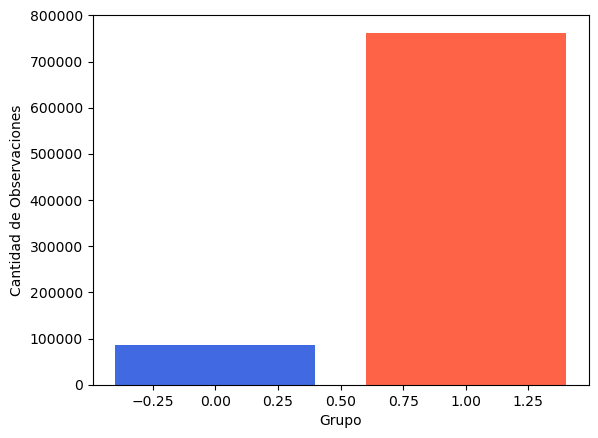

In [33]:
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'tomato', 'forestgreen', 'purple', 'gold']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [34]:
centroids3 = kmeans3.cluster_centers_
print(centroids3)

[[-1.03775266  0.01427786  0.25886311]
 [ 0.64137743  0.01199011  0.27056952]
 [ 0.04253768 -0.13084236 -2.70504905]]


In [35]:
y_means3 = kmeans3.fit_predict(datos_scaled)

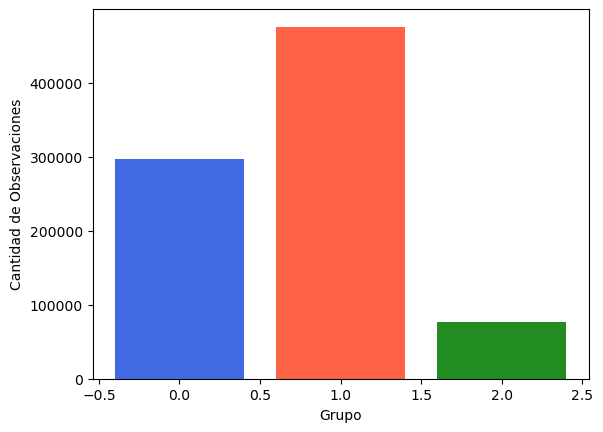

In [36]:
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'tomato', 'forestgreen', 'purple', 'gold']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [37]:
centroids4 = kmeans4.cluster_centers_
print(centroids4)

[[ 0.0339915  -0.25567346 -2.81895155]
 [ 0.30877886  1.16956523  0.17507967]
 [-1.12567513 -0.1339566   0.25679892]
 [ 0.63503678 -0.48812202  0.2866148 ]]


In [38]:
y_means4 = kmeans4.fit_predict(datos_scaled)

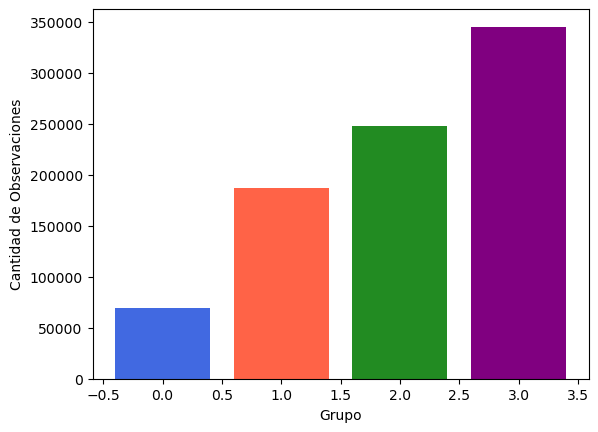

In [39]:
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'tomato', 'forestgreen', 'purple', 'gold']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [40]:
etiquetas_2 = kmeans2.labels_
etiquetas_3 = kmeans3.labels_
etiquetas_4 = kmeans4.labels_
etiquetas_5 = kmeans5.labels_
etiquetas_6 = kmeans6.labels_

In [42]:
kmeans5 = KMeans(n_clusters=5, random_state=0)


In [43]:
kmeans5.fit(datos_scaled)


KMeans(n_clusters=5, random_state=0)

In [44]:
centroids5 = kmeans5.cluster_centers_
print(centroids5)


[[ 0.03324037 -0.28005586 -2.86048838]
 [ 0.67754171 -0.05595237  0.25222328]
 [ 0.11592343 -1.76265304  0.41676229]
 [-1.12826591  0.00997479  0.24174214]
 [ 0.20371764  1.47881702  0.1117008 ]]


In [45]:
y_means5 = kmeans5.fit_predict(datos_scaled)


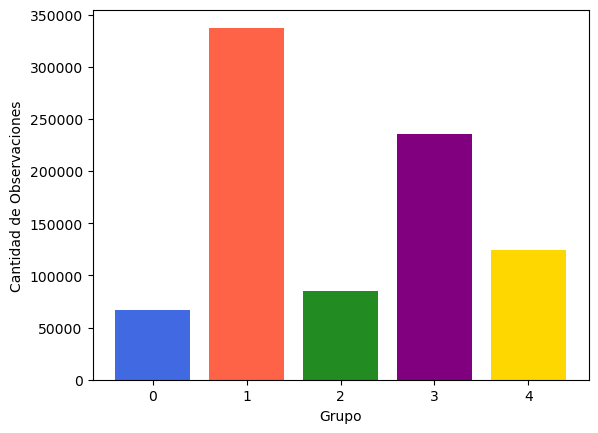

In [46]:
cluster_counts = np.bincount(y_means5)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'tomato', 'forestgreen', 'purple', 'gold']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


In [ ]:
# Se realiza el método del codo para determinar la cantidad de clusters
k=np. arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(datos_scaled)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

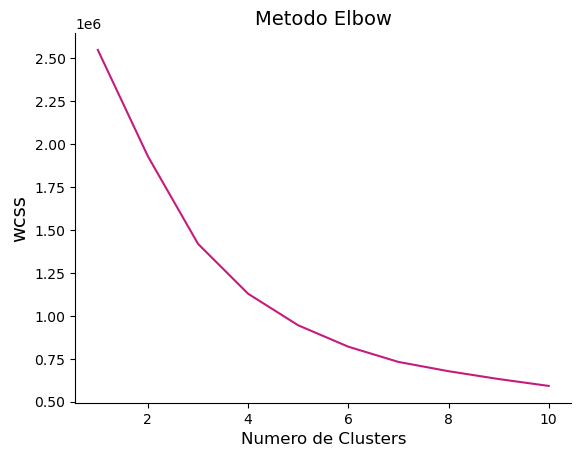

In [41]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(datos_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Hasta acá llega lo que pude hacer.

Lo siguiente es lo de la silueta que nunca terminó de correr y lo tuve que parar. 

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(datos_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(datos_scaled, labels, metric='euclidean'))

Y lo siguiente son códigos que quedaron sueltos pero no quería borrar por las dudas. 

In [ ]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, marker='o', linestyle='-', color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

In [ ]:
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [ ]:
# Se observa la distribución
plt.figure(figsize=(20,8))
sns.countplot (x= "rating", data=punt4)
plt.title("Puntaje")
plt.xticks(rotation=90)
plt.show () 

In [ ]:
# Se visualiza en otro tipo de gráfico
plt.plot(k, marker='o', linestyle='-', color='b')
plt.axvline(3, 0, 1, color='red')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Puntaje del modelo')
plt.title('Puntaje del modelo para determinar el número óptimo de clusters')
plt.show()

In [ ]:
# Se especifica la cantidad de clusters
num_clusters=3

# Se crea una instancia del modelo K-Means
kmeans = KMeans(n_clusters=num_clusters)

# Se ajusta el modelo a tus datos
kmeans.fit(x)
kmeans.fit(x)
kmeans
# Se obtiene las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

# Se obtiene las coordenadas de los centroides de los clústeres
centroids = kmeans.cluster_centers_
centroids = kmeans
print (centroids)

In [ ]:
# Se crea un gráfico de dispersión para visualizar la distribución de los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='userId', hue='cluster', data=x, palette='viridis')
plt.title('Distribución de Clústeres')
plt.show()

In [ ]:
# Se crea una columna plataforma con 
"""def asignar_plataforma(movieId):
    if 'a' in movieId:
        return 'Amazon'
    elif 'n' in movieId:
        return 'Netflix'
    elif 'd' in movieId:
        return 'Disney'
    elif 'h' in movieId:
        return 'hulu'
    
punt2['plataforma'] = punt2['movieId'].apply(asignar_plataforma)
""" 

In [ ]:
# Se realizan códigos para la columna plataforma que posee variables cualitativas
"""map_plataforma = {'Netflix': 1, 'Amazon': 2, 'Disney': 3}
punt2['plataforma'] = punt2['plataforma'].replace(map_plataforma)
""""

In [ ]:
# Se eliminan las letras de la columan movieId
"""
def eliminar_letras(texto):
    return re.sub(r'[a-zA-Z]', '', texto)
# Se Aplica la función a la columna 'movieId'
punt2['movieId'] = punt2['movieId'].apply(eliminar_letras)
"""

In [ ]:
# Se guarda el dataset a csv
# punt2.to_csv(r'..\datasets\punt_pelis.csv', index=False)